# Plots
### Gavin Rolls
This is a workspace for much of the plotting/data vis I need to do. I will do my best not to repeat visualisations created in the other files here

## Library Imports

In [341]:
#Basics
import pandas as pd
import geopandas as gpd
import numpy as np

#Plots and Stats
import matplotlib.pyplot as plt
import seaborn as sns

# Geometry
from shapely import wkt
from shapely.geometry import Polygon, MultiPolygon

## Data Imports

In [343]:
# Raw Overture Maps Places
london_places = gpd.read_file('data/overture_data/london_places.geojson')
bham_places = gpd.read_file('data/overture_data/bham_places.geojson')

# All London Data
all_data_london = pd.read_csv("data/combined_data/lag/all_data_london_lag.csv")

# All Birmingham Data
all_data_bham = pd.read_csv("data/combined_data/lag/all_data_bham_lag.csv")

# Convert data to GDF
all_data_london['geometry'] = all_data_london['geometry'].apply(wkt.loads)
all_data_bham['geometry'] = all_data_bham['geometry'].apply(wkt.loads)

all_data_london = gpd.GeoDataFrame(all_data_london, geometry='geometry')
all_data_bham = gpd.GeoDataFrame(all_data_bham, geometry='geometry')

all_data_london.set_crs(epsg=4326, inplace=True)
all_data_bham.set_crs(epsg=4326, inplace=True)

# Filter places to boundary areas
london_places_join = gpd.sjoin(london_places, all_data_london, how='inner', op='within')
bham_places_join = gpd.sjoin(bham_places, all_data_bham, how='inner', op='within')

london_places = london_places_join[london_places.columns]
bham_places = bham_places_join[bham_places.columns]

/Users/gavinrolls/anaconda3/envs/urbsim/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/gavinrolls/anaconda3/envs/urbsim/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [344]:
# Sanity Check
london_places.head()

name           category  confidence  \
1519      The Star, Malden Rushett                pub        0.96   
1520   Hillcroft Bed And Breakfast  bed_and_breakfast        0.77   
1521                    C-Ceramics               None        0.77   
36917            The Star Gun Club        active_life        0.86   
36918      Byhurst Farm Clay Shoot               farm        0.92   

                        geometry  
1519   POINT (-0.32762 51.32683)  
1520   POINT (-0.32662 51.32736)  
1521   POINT (-0.32662 51.32736)  
36917  POINT (-0.32914 51.32922)  
36918  POINT (-0.32463 51.33735)

## Plots

### Kernel Density Estimation - Overture Maps Places

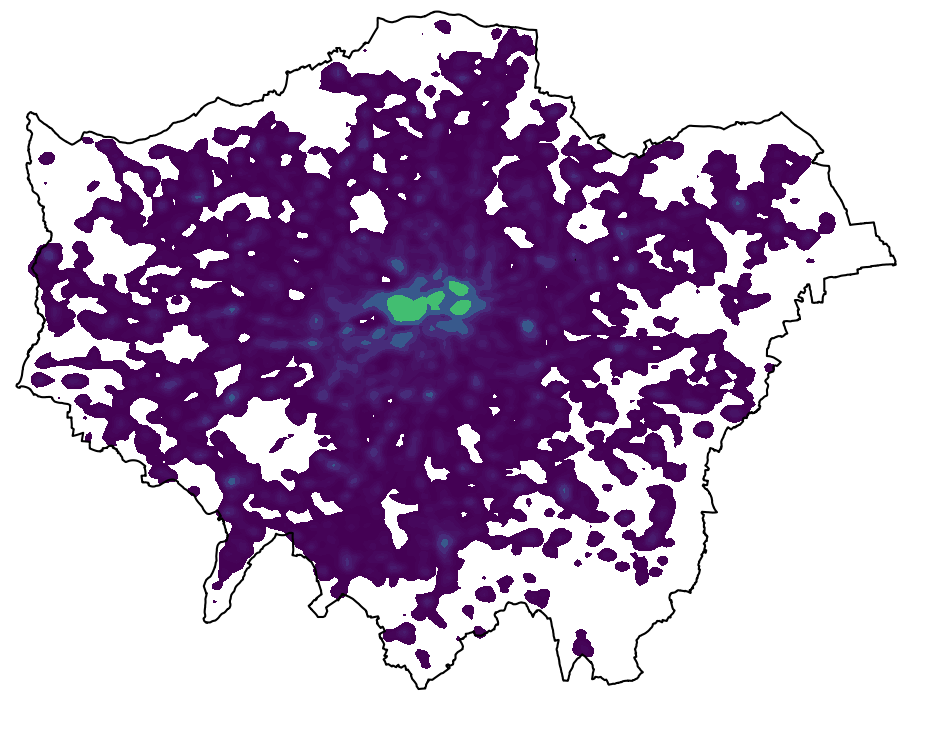

In [347]:
# Plot for Greater London

plt.figure(figsize=(12, 10))

sns.kdeplot(
    x=london_places.geometry.x,
    y=london_places.geometry.y,
    cmap='viridis',
    fill=True,
    bw_adjust=0.2
)

sns.set_theme()

greater_london_boundary = all_data_london.unary_union
boundary_gdf = gpd.GeoDataFrame(geometry=[greater_london_boundary], crs=all_data_london.crs)
boundary_gdf.boundary.plot(ax=plt.gca(), color='black')

# Add labels and title
plt.axis('off')
# plt.title('KDE Plot of Overture Places - London')

# Show the plot
plt.show()

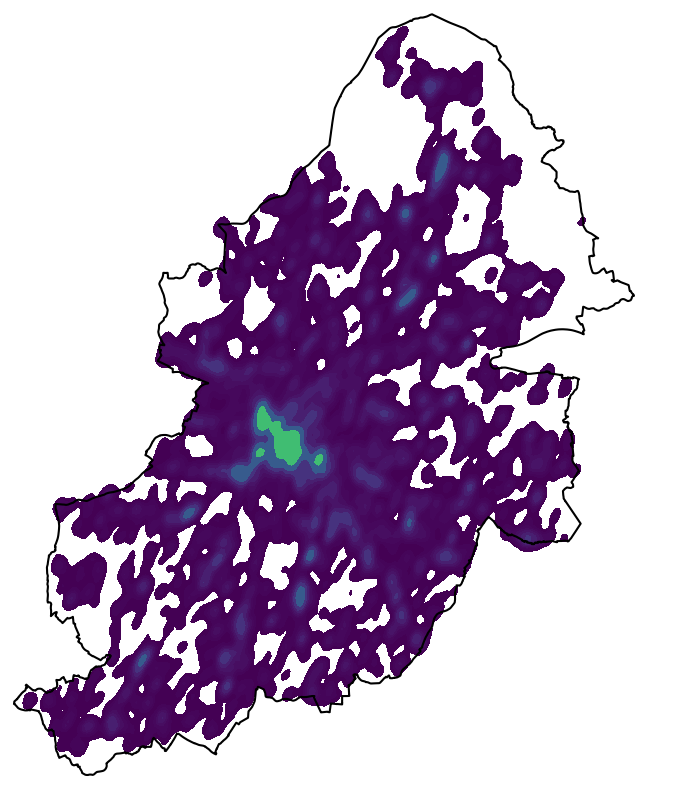

In [348]:
# Plot for Birmingham

plt.figure(figsize=(12, 10))

sns.kdeplot(
    x=bham_places.geometry.x,
    y=bham_places.geometry.y,
    cmap='viridis',
    fill=True,
    bw_adjust=0.2
)
sns.set_theme()

bham_boundary = all_data_bham.unary_union
boundary_gdf = gpd.GeoDataFrame(geometry=[bham_boundary], crs=all_data_bham.crs)
boundary_gdf.boundary.plot(ax=plt.gca(), color='black')

# Add labels and title
plt.axis('off')
# plt.title('KDE Plot of Overture Places - Birmingham')

# Show the plot
plt.show()

### Histogram of POIs per LSOA

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/1191484469.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


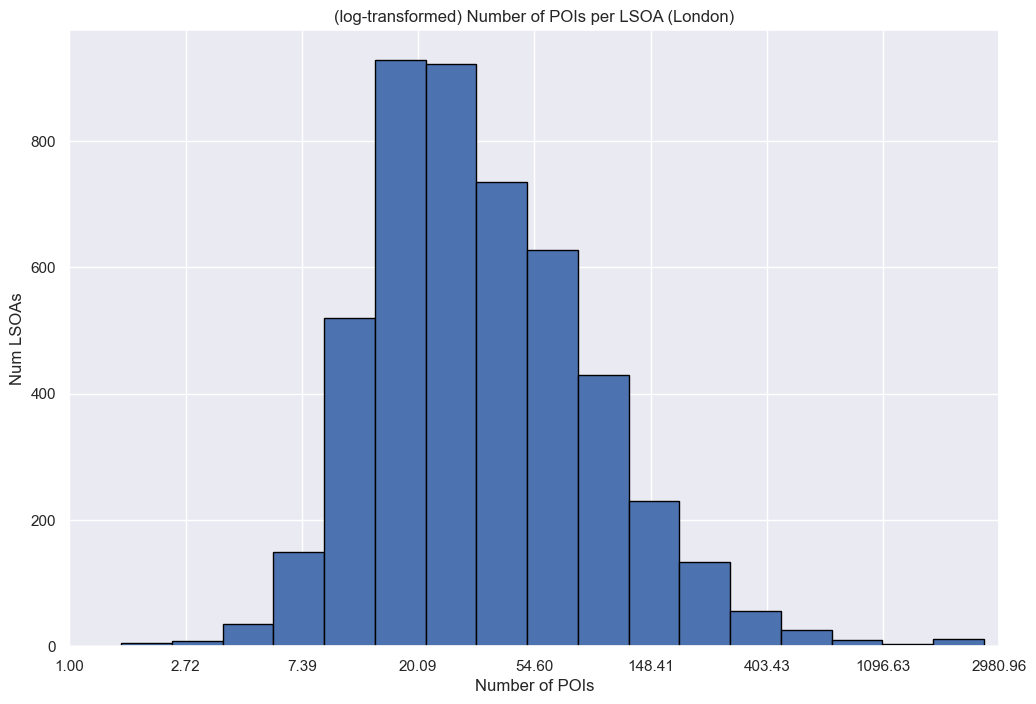

In [350]:
places_per_lsoa = pd.DataFrame(all_data_london['log_num_places'])

plt.figure(figsize=(12, 8))
plt.hist(places_per_lsoa, bins=20, edgecolor='black')
sns.set_theme()
plt.xlim(0,8)
plt.ylabel('Num LSOAs')
plt.xlabel('Number of POIs')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.title('(log-transformed) Number of POIs per LSOA (London)')
plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/1130265843.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


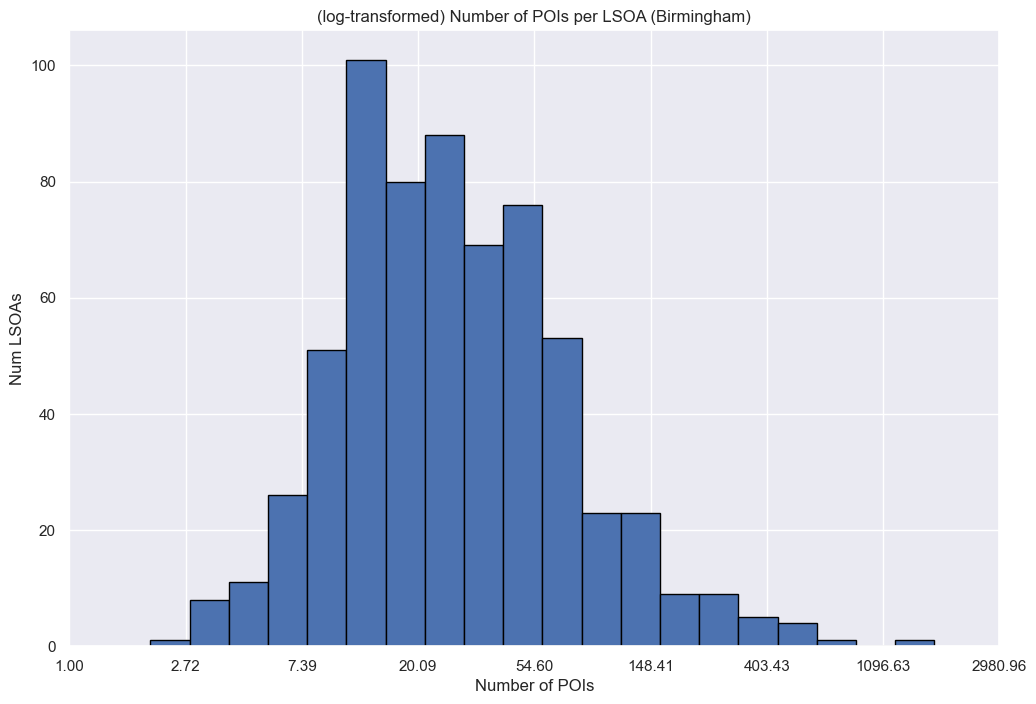

In [351]:
places_per_lsoa = pd.DataFrame(all_data_bham['log_num_places'])

plt.figure(figsize=(12, 8))
plt.hist(places_per_lsoa, bins=20, edgecolor='black')
sns.set_theme()
plt.xlim(0,8)
plt.ylabel('Num LSOAs')
plt.xlabel('Number of POIs')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.title('(log-transformed) Number of POIs per LSOA (Birmingham)')
plt.show()

### Frequency of Place Types (Top 20)

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/2539250406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_top.values, y=category_top.index, palette='viridis')


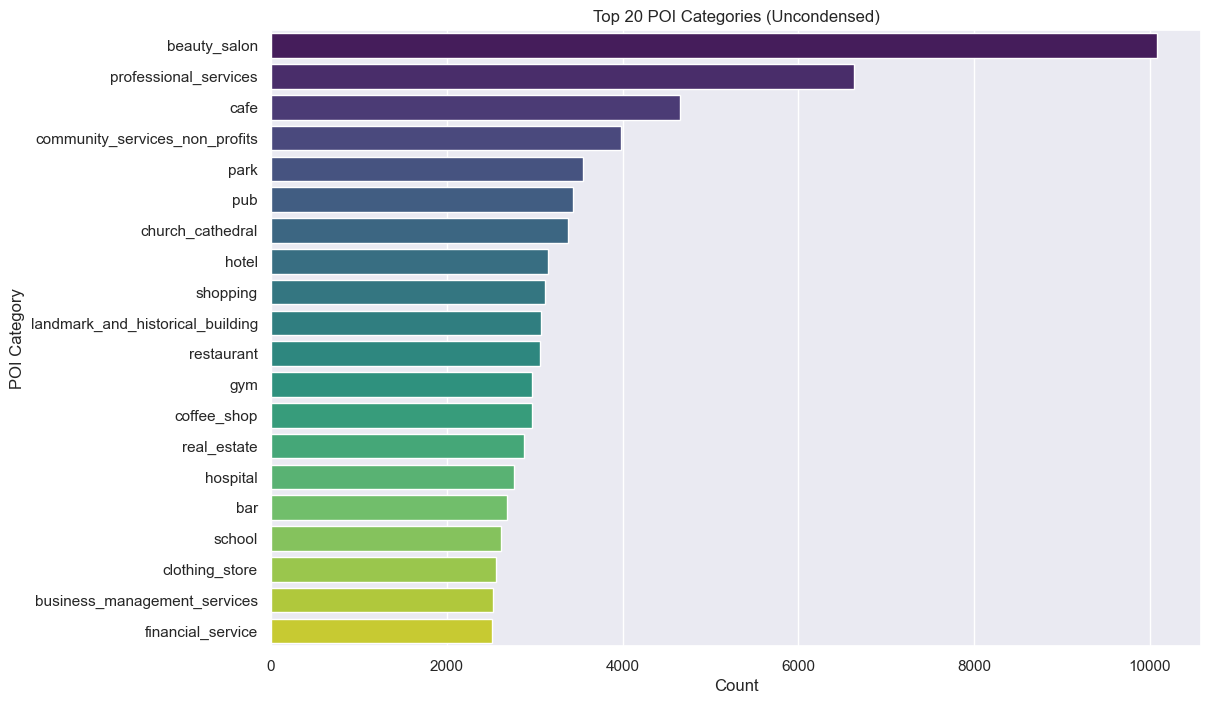

In [353]:
all_places = pd.concat([london_places, bham_places], axis=0)

category_counts = all_places['category'].value_counts()

category_top = all_places['category'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=category_top.values, y=category_top.index, palette='viridis')
sns.set_theme()
plt.xlabel('Count')
plt.ylabel('POI Category')
plt.title('Top 20 POI Categories (Uncondensed)')
plt.show()

### Frequency of Place Types (Top 20 Condensed)

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/2399647150.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condensed_top['Count'], y=condensed_top.index, palette='viridis')


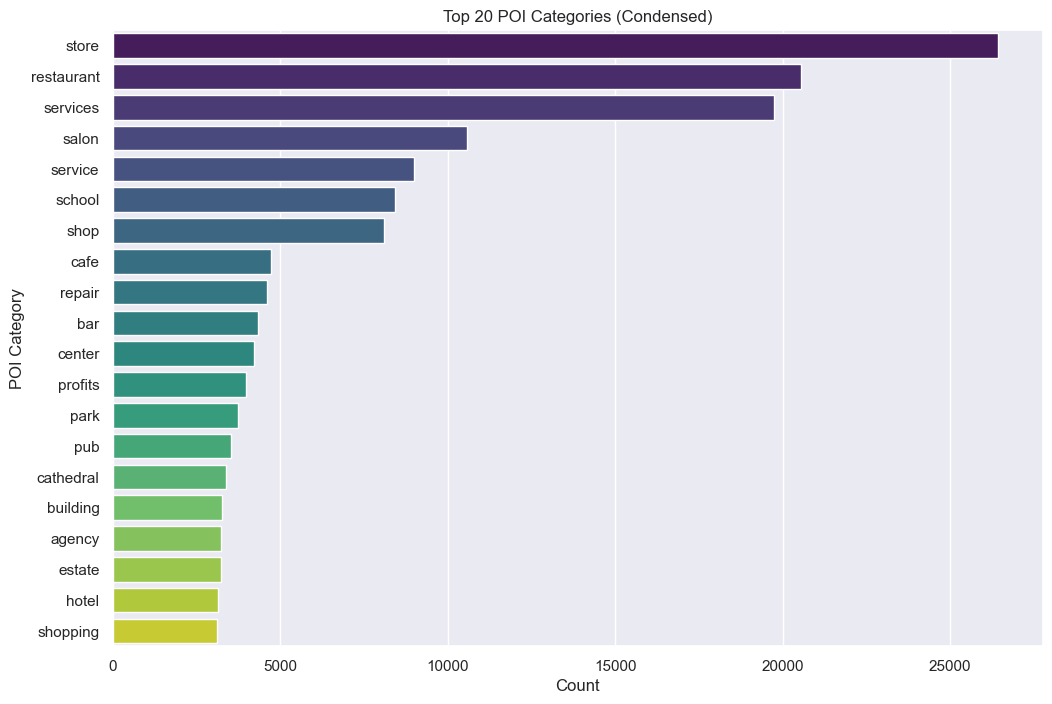

In [355]:
# Recycle the category collapse logic from DataCleaning.ipynb

# Automated Condensing of Column Types

# I'll group them by 'suffix' to find commonalities
suffix_groups = {}

# Iterate through
for index in category_counts.index:
    lower_index = index.lower()
    parts = lower_index.split('_')
    if len(parts) > 1:
        suffix = parts[-1]
        if suffix in suffix_groups:
            suffix_groups[suffix] += category_counts.loc[index].sum()
        else:
            suffix_groups[suffix] = category_counts.loc[index].sum()
    else:
        # Handle rows without suffixes
        suffix_groups[parts[0]] = category_counts.loc[index].sum()

condensed_categories = pd.DataFrame.from_dict(suffix_groups, orient='index', columns=['Count'])

condensed_categories_sorted = condensed_categories.sort_values(by='Count', ascending=False)

condensed_top = condensed_categories_sorted.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=condensed_top['Count'], y=condensed_top.index, palette='viridis')
sns.set_theme()
plt.xlabel('Count')
plt.ylabel('POI Category')
plt.title('Top 20 POI Categories (Condensed)')
plt.show()

### Collinearity Checks

In [358]:
# London

selected_columns = [
    'log_total_employment',
    'employment_density',
    'office_employment_density',
    'population',
    'log_num_places',
    'log_num_buildings',
    'all_avg_building_area',
    'all_lsoa_area_ratio',
    'all_total_area',
    'all_store',
    'all_restaurant',
    'all_services',
    'all_salon',
    'all_service',
    'all_school',
    'all_shop',
    'all_cafe',
    'all_repair',
    'all_bar'
]

column_display_names = {
    'log_total_employment': 'Total Employment (log)',
    'employment_density': 'Employment Density',
    'office_employment_density': 'Office Employment Density',
    'population': 'Population',
    'log_num_places': 'Number of POIs (log)',
    'log_num_buildings': 'Number of Buildings (log)',
    'all_avg_building_area': 'Average Building Area',
    'all_lsoa_area_ratio': 'Building Density',
    'all_total_area': 'Total Area of Buildings',
    'all_store': 'Stores',
    'all_restaurant': 'Restaurants',
    'all_services': 'Services',
    'all_salon': 'Salons',
    'all_service': 'Service',
    'all_school': 'Schools',
    'all_shop': 'Shops',
    'all_cafe': 'Cafes',
    'all_repair': 'Repair Shops',
    'all_bar': 'Bars'
}

colinearity_features = all_data_london[selected_columns]

plt.figure(figsize=(20,15))

# Heatmap
sns.set_theme()
heatmap = sns.heatmap(colinearity_features.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)
heatmap.set_xticklabels([column_display_names[label.get_text()] for label in xticklabels], fontsize=14)
heatmap.set_yticklabels([column_display_names[label.get_text()] for label in yticklabels], fontsize=14)
plt.title('Correlation Between LSOA Features - London', fontsize=18)
plt.show()


NameError: name 'xticklabels' is not defined

In [372]:
# Birmingham

selected_columns = [
    'log_total_employment',
    'employment_density',
    'office_employment_density',
    'population',
    'log_num_places',
    'log_num_buildings',
    'all_avg_building_area',
    'all_lsoa_area_ratio',
    'all_total_area',
    'all_store',
    'all_restaurant',
    'all_services',
    'all_salon',
    'all_service',
    'all_school',
    'all_shop',
    'all_cafe',
    'all_repair',
    'all_bar'
]

colinearity_features = all_data_bham[selected_columns]

plt.figure(figsize=(20,15))

# Heatmap
sns.set_theme()
heatmap = sns.heatmap(colinearity_features.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14) 
plt.title('Correlation Between LSOA Features - Birmingham', fontsize=18)
plt.show()


### Example Building Footprint Images

These have been taken from my old repository and are stored in the plots folder

### Building Counts (By Type and Overall) - Per City

In [256]:
# Total Number of Buildings by Type - London, Bham, Total


total_buildings_london = all_data_london['num_buildings'].sum()
total_commercial_buildings_london = all_data_london['num_commercial_buildings'].sum()
total_retail_buildings_london = all_data_london['num_retail_buildings'].sum()
total_office_buildings_london = all_data_london['num_office_buildings'].sum()
total_residential_buildings_london = all_data_london['num_residential_buildings'].sum()

total_buildings_bham = all_data_bham['num_buildings'].sum()
total_commercial_buildings_bham = all_data_bham['num_commercial_buildings'].sum()
total_retail_buildings_bham = all_data_bham['num_retail_buildings'].sum()
total_office_buildings_bham = all_data_bham['num_office_buildings'].sum()
total_residential_buildings_bham = all_data_bham['num_residential_buildings'].sum()

percent_unclassed_london = (total_buildings_london - total_commercial_buildings_london - total_retail_buildings_london - total_office_buildings_london - total_residential_buildings_london) / total_buildings_london
percent_commercial_buildings_london = total_commercial_buildings_london / total_buildings_london
percent_retail_buildings_london = total_retail_buildings_london / total_buildings_london
percent_office_buildings_london = total_office_buildings_london / total_buildings_london
percent_residential_buildings_london = total_residential_buildings_london / total_buildings_london

percent_unclassed_bham = (total_buildings_bham - total_commercial_buildings_bham - total_retail_buildings_bham - total_office_buildings_bham - total_residential_buildings_bham) / total_buildings_bham
percent_commercial_buildings_bham = total_commercial_buildings_bham / total_buildings_bham
percent_retail_buildings_bham = total_retail_buildings_bham / total_buildings_bham
percent_office_buildings_bham = total_office_buildings_bham / total_buildings_bham
percent_residential_buildings_bham = total_residential_buildings_bham / total_buildings_bham


print('----- London -----')
print('Total Buildings: ' + str(total_buildings_london))
print('Commercial Buildings: ' + str(total_commercial_buildings_london) + ' (' + str(round(percent_commercial_buildings_london * 100, 2)) + '%)')
print('Retail Buildings: ' + str(total_retail_buildings_london) + ' (' + str(round(percent_retail_buildings_london * 100, 2)) + '%)')
print('Office Buildings: ' + str(total_office_buildings_london) + ' (' + str(round(percent_office_buildings_london * 100, 2)) + '%)')
print('Residential Buildings: ' + str(total_residential_buildings_london) + ' (' + str(round(percent_residential_buildings_london * 100, 2)) + '%)')
print('Unclassified Buildings: ' + str(total_buildings_london - total_commercial_buildings_london - total_retail_buildings_london - total_office_buildings_london - total_residential_buildings_london) + ' (' + str(round(percent_unclassed_london * 100, 2)) + '%)')

# Print the results for Birmingham
print('----- Birmingham -----')
print('Total Buildings: ' + str(total_buildings_bham))
print('Commercial Buildings: ' + str(total_commercial_buildings_bham) + ' (' + str(round(percent_commercial_buildings_bham * 100, 2)) + '%)')
print('Retail Buildings: ' + str(total_retail_buildings_bham) + ' (' + str(round(percent_retail_buildings_bham * 100, 2)) + '%)')
print('Office Buildings: ' + str(total_office_buildings_bham) + ' (' + str(round(percent_office_buildings_bham * 100, 2)) + '%)')
print('Residential Buildings: ' + str(total_residential_buildings_bham) + ' (' + str(round(percent_residential_buildings_bham * 100, 2)) + '%)')
print('Unclassified Buildings: ' + str(total_buildings_bham - total_commercial_buildings_bham - total_retail_buildings_bham - total_office_buildings_bham - total_residential_buildings_bham) + ' (' + str(round(percent_unclassed_bham * 100, 2)) + '%)')


----- London -----
Total Buildings: 993653
Commercial Buildings: 5787 (0.58%)
Retail Buildings: 12222 (1.23%)
Office Buildings: 2039 (0.21%)
Residential Buildings: 85628 (8.62%)
Unclassified Buildings: 887977 (89.36%)
----- Birmingham -----
Total Buildings: 260249.0
Commercial Buildings: 336.0 (0.13%)
Retail Buildings: 3652.0 (1.4%)
Office Buildings: 212.0 (0.08%)
Residential Buildings: 191361.0 (73.53%)
Unclassified Buildings: 64688.0 (24.86%)


### Histogram of Building Type Count per LSOA

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/1454033685.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


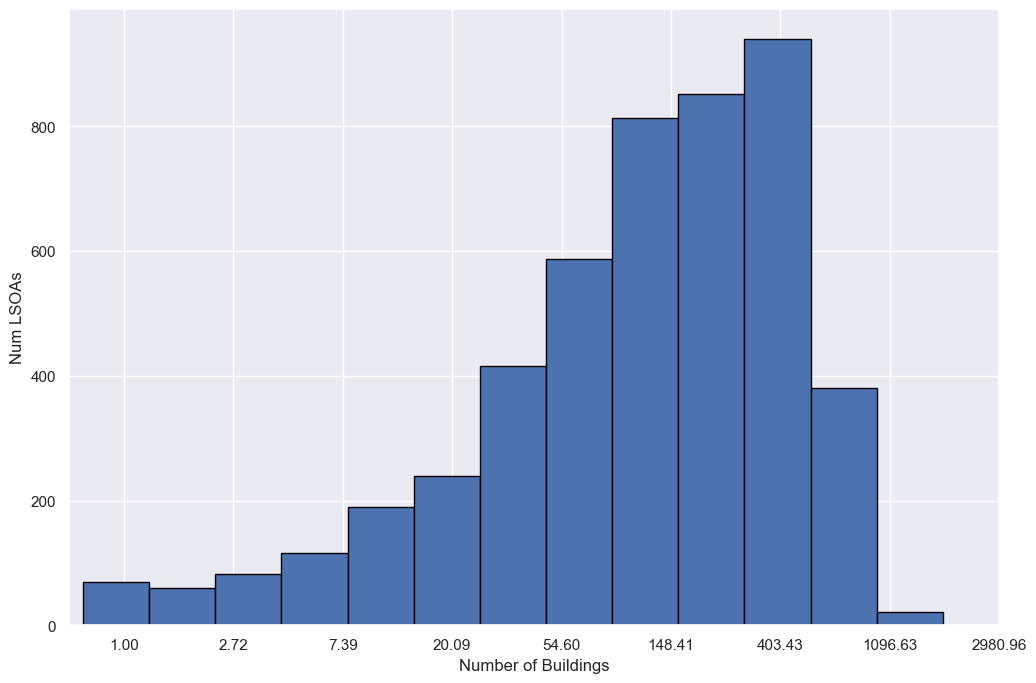

In [298]:
# Buildings per LSOA London

num_buildings_per_lsoa = pd.DataFrame(all_data_london['log_num_buildings'])

plt.figure(figsize=(12, 8))
plt.hist(num_buildings_per_lsoa, bins=20, edgecolor='black')
plt.xlim(-0.5,8)
sns.set_theme()
plt.ylabel('Num LSOAs')
plt.xlabel('Number of Buildings')
# plt.title('(log-transformed) Number of Buildings per LSOA (London)')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/1737036757.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


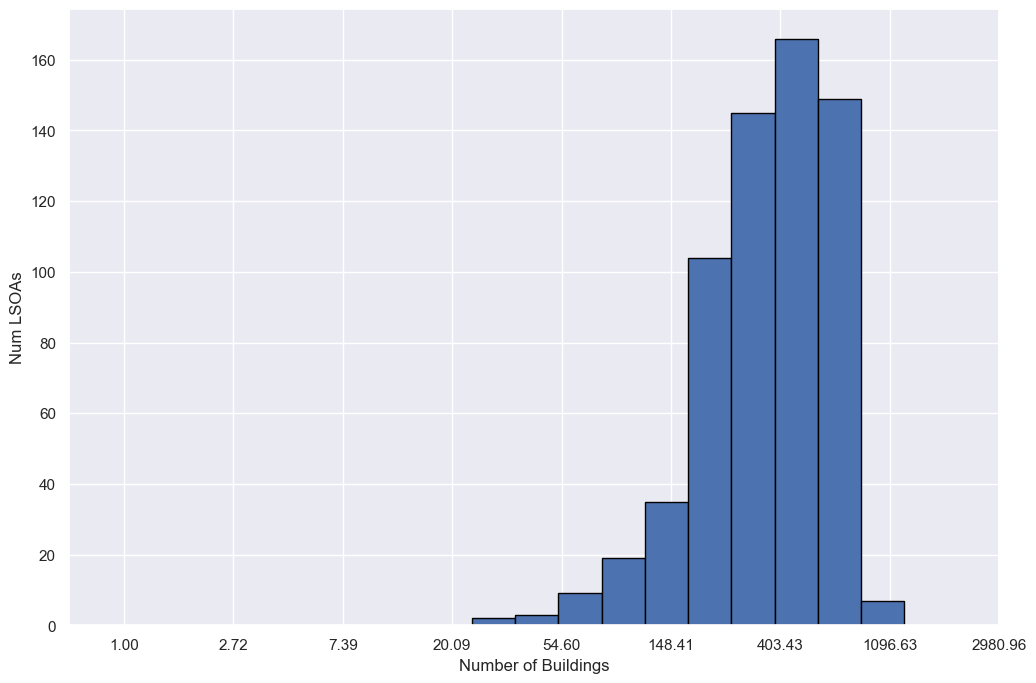

In [300]:
# Buildings per LSOA Bham

num_buildings_per_lsoa = pd.DataFrame(all_data_bham['log_num_buildings'])

plt.figure(figsize=(12, 8))
plt.hist(num_buildings_per_lsoa, bins=10, edgecolor='black')
plt.xlim(-0.5,8)
sns.set_theme()
plt.ylabel('Num LSOAs')
plt.xlabel('Number of Buildings')
# plt.title('(log-transformed) Number of Buildings per LSOA (Birmingham)')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.show()

### Feature Distribution Maps (See Exploratory Data Analysis Section for List of Needed)

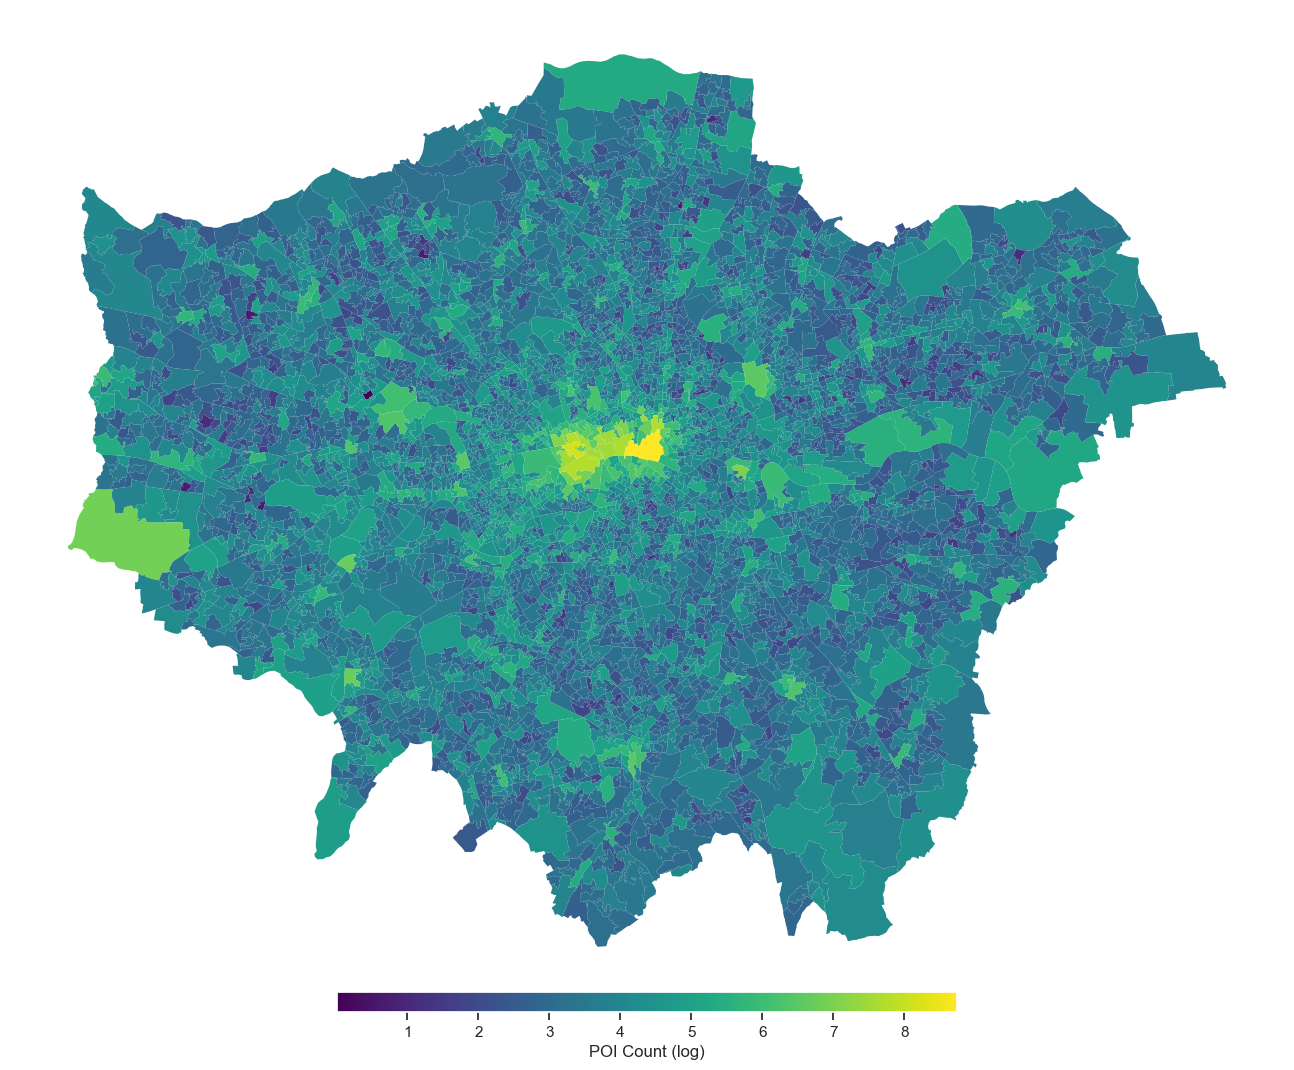

In [304]:
# POIs in London

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
all_data_london.plot(ax=ax, column='log_num_places', linewidth=0, legend = True, cmap='viridis',
                     legend_kwds = {
                         'label': "POI Count (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

# plt.title('Overture POI Count Map of London LSOAs (log-transformed)')
ax.set_axis_off()
plt.show()

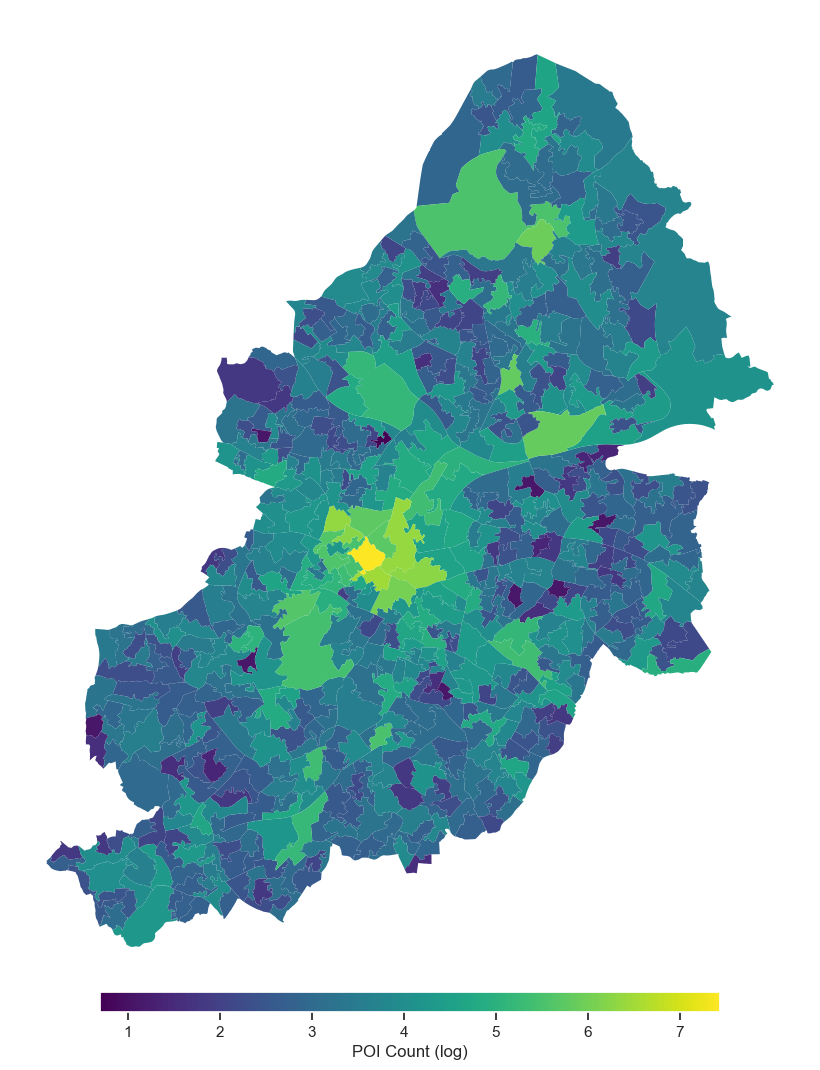

In [302]:
# POIs in Birmingham

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
sns.set_theme()
all_data_bham.plot(ax=ax, column='log_num_places', linewidth=0, legend = True, cmap='viridis',
                     legend_kwds = {
                         'label': "POI Count (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

# plt.title('Overture POI Count Map of Birmingham LSOAs (log-transformed)')
ax.set_axis_off()
plt.show()

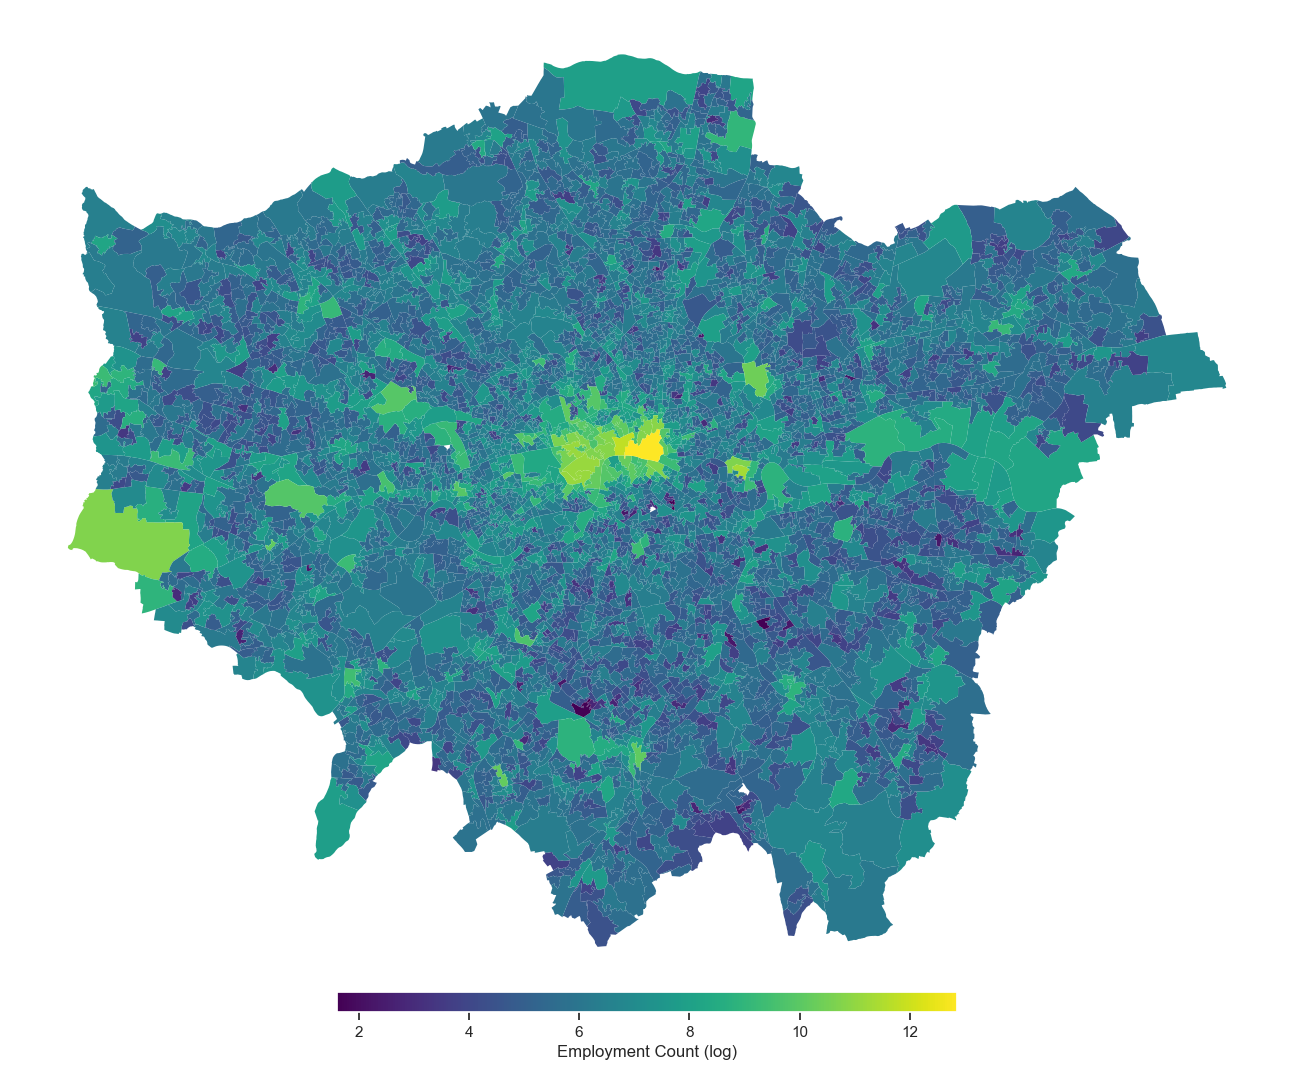

In [308]:
# Employment (log) in London

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
all_data_london.plot(ax=ax, column='log_total_employment', linewidth=0, legend = True, cmap='viridis',
                     legend_kwds = {
                         'label': "Employment Count (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

# plt.title('Overture POI Count Map of London LSOAs (log-transformed)')
ax.set_axis_off()
plt.show()

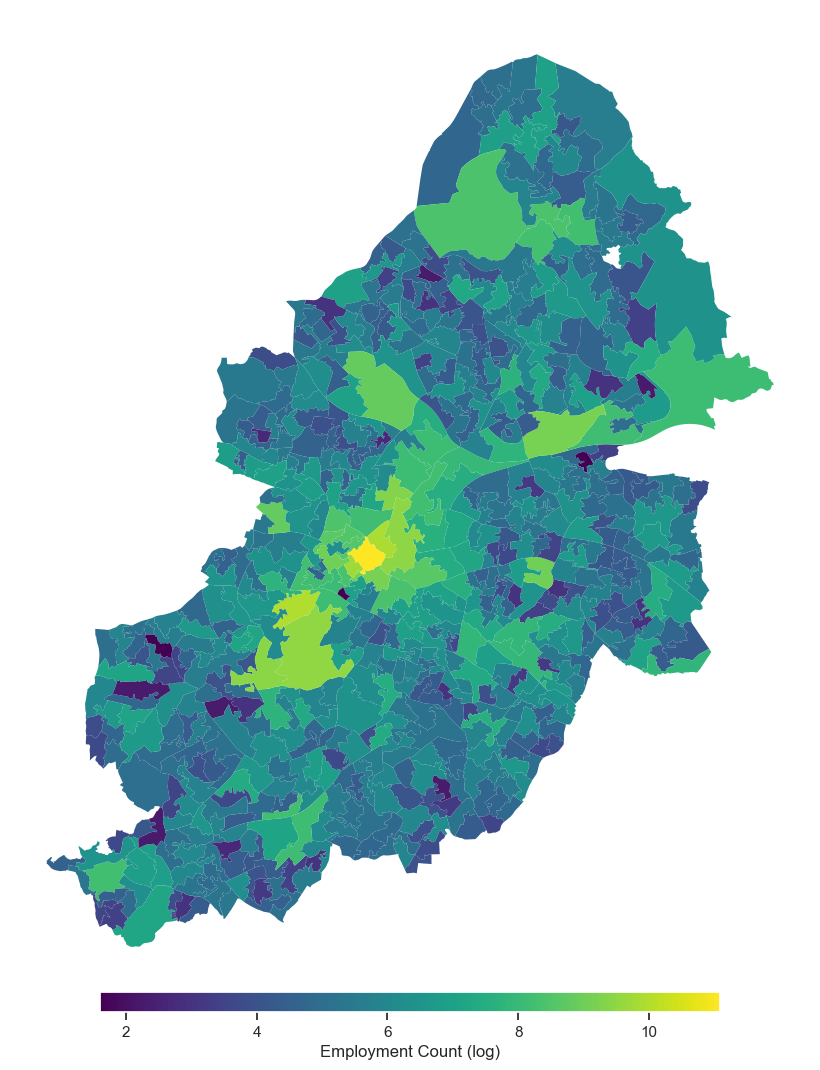

In [310]:
# Employment (log) in Birmingham

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
all_data_bham.plot(ax=ax, column='log_total_employment', linewidth=0, legend = True, cmap='viridis',
                     legend_kwds = {
                         'label': "Employment Count (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

# plt.title('Overture POI Count Map of Birmingham LSOAs (log-transformed)')
ax.set_axis_off()
plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/4202094532.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


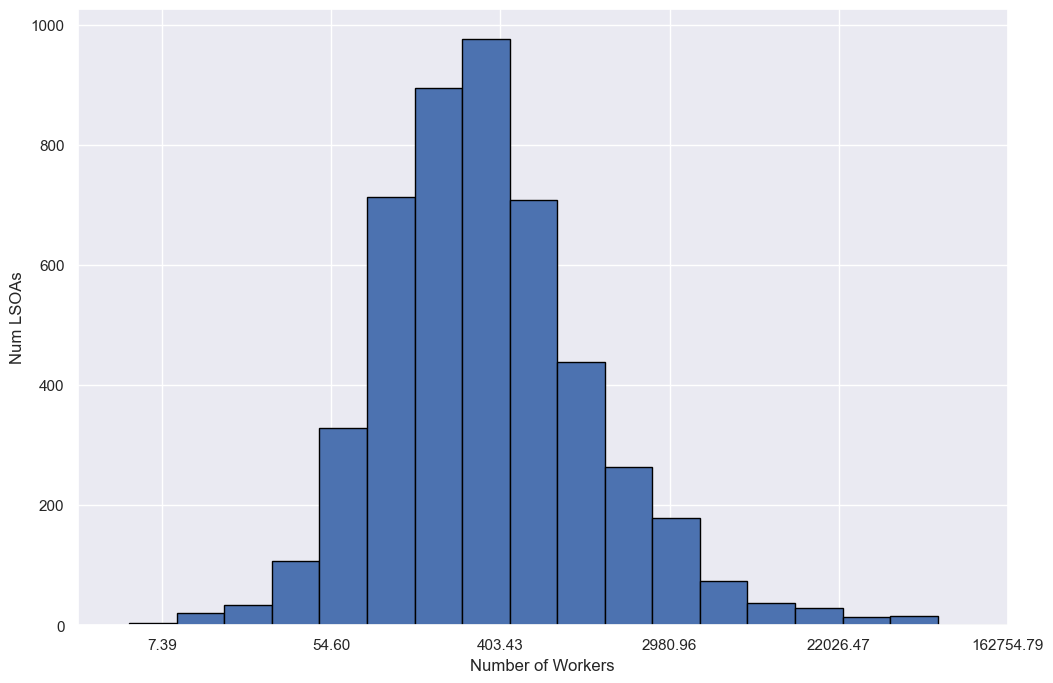

In [330]:
# Total Employment per LSOA London

num_workers_per_lsoa = pd.DataFrame(all_data_london['log_total_employment'])

plt.figure(figsize=(12, 8))
plt.hist(num_workers_per_lsoa, bins=20, edgecolor='black')
plt.gca().set_xlim(1,12)
sns.set_theme()
plt.ylabel('Num LSOAs')
plt.xlabel('Number of Workers')
# plt.title('(log-transformed) Number of Workers per LSOA (London)')
tick_vals = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
transformed_tick_labels = np.exp(tick_vals)

plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/3787687268.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


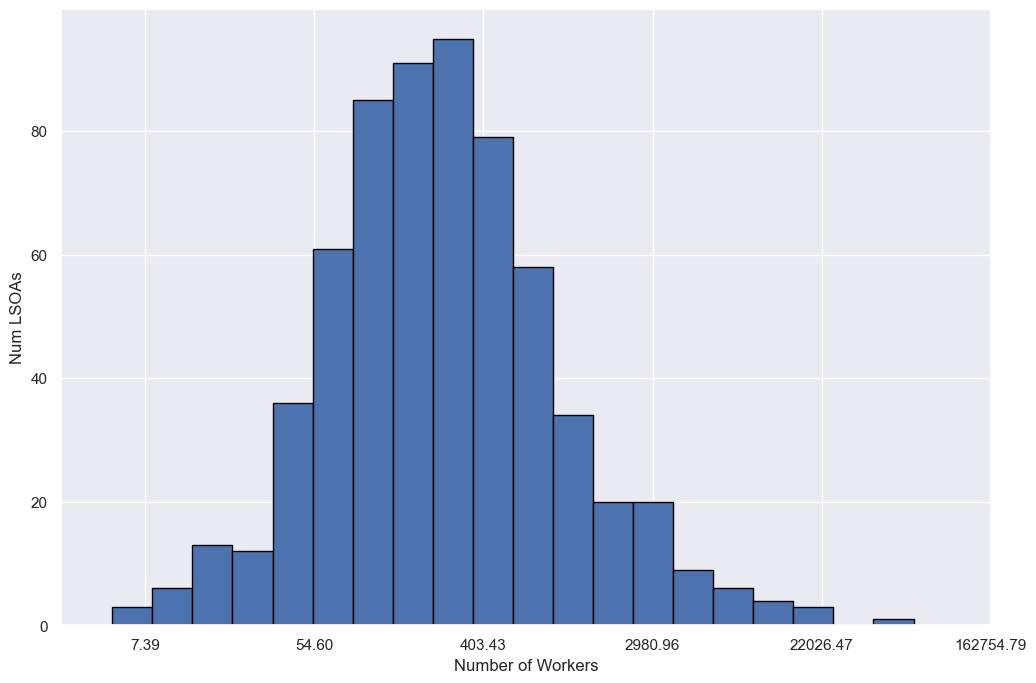

In [332]:
# Total Employment per LSOA Bham

num_workers_per_lsoa = pd.DataFrame(all_data_bham['log_total_employment'])

plt.figure(figsize=(12, 8))
plt.hist(num_workers_per_lsoa, bins=20 , edgecolor='black')
plt.gca().set_xlim(1,12)
sns.set_theme()
plt.ylabel('Num LSOAs')
plt.xlabel('Number of Workers')
# plt.title('(log-transformed) Number of Workers per LSOA (Birmingham)')
tick_vals = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
transformed_tick_labels = np.exp(tick_vals)
plt.show()

### Overture Places Confidence Histogram

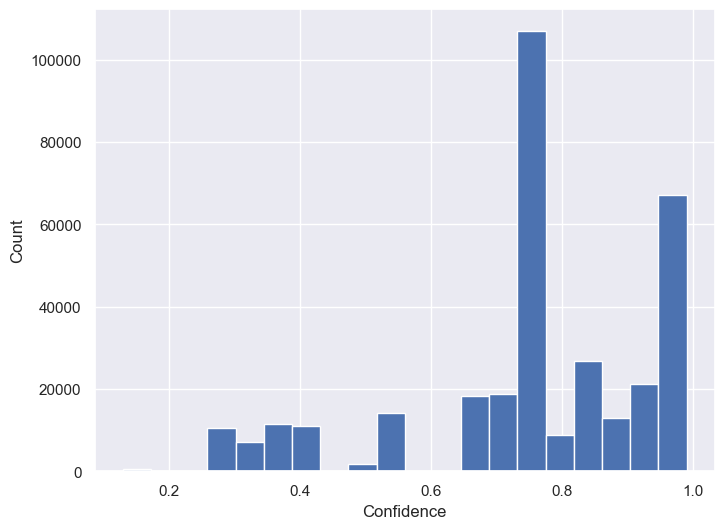

In [193]:
plt.figure(figsize=(8, 6))
plt.hist(all_places['confidence'], bins = 20, fill=True)
plt.xlabel('Confidence')
plt.ylabel('Count')
# plt.title('Histogram of Overture POI Confidence Values')
plt.grid(True)
plt.show()